In [0]:
import pandas as pd
import numpy as np
from sklearn.decomposition import LatentDirichletAllocation

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
from sklearn.mixture import GaussianMixture

In [0]:
meltPt_prop2 = pd.read_csv('/content/drive/My Drive/Data_LDA/cleaned_MeltingPt_vecs.csv')

In [0]:
labels = pd.read_csv('/content/drive/My Drive/Data_LDA/meltPt_prop2.csv')
labels.head()

,Unnamed: 0,smiles,mf,mw,em,logP,logS,psa,donorCount,centerCount,rotatableBondCount,acceptorCount,mpC
0,0,B(C)(C)Br ...,C2H6BBr,120.78464,119.974591,1.3934,1.781,0.000000,0,0,0,0,-129.0
1,1,B(C)(O)O ...,CH5O2B,59.85970,60.038260,0.6967,1.820,40.459999,2,0,0,2,92.0
2,2,B(C1CC1)(O)O ...,C3H7O2B,85.89758,86.053910,0.6840,1.470,40.459999,2,0,1,2,93.0
3,3,B(C=CCC(C)C)(O)O ...,C6H13O2B,127.97822,128.100860,1.9440,0.927,40.459999,2,0,3,2,101.0
4,4,B(C=CCCC)(O)O ...,C5H11O2B,113.95134,114.085210,1.7257,1.087,40.459999,2,0,3,2,80.0


In [0]:
labels.set_index('smiles', inplace=True)
labels.drop(columns=["Unnamed: 0"], inplace=True)
labels.drop(columns=["mf"], inplace=True)
labels.head()

,mw,em,logP,logS,psa,donorCount,centerCount,rotatableBondCount,acceptorCount,mpC
smiles,,,,,,,,,,
B(C)(C)Br,120.78464,119.974591,1.3934,1.781,0.000000,0,0,0,0,-129.0
B(C)(O)O,59.85970,60.038260,0.6967,1.820,40.459999,2,0,0,2,92.0
B(C1CC1)(O)O,85.89758,86.053910,0.6840,1.470,40.459999,2,0,1,2,93.0
B(C=CCC(C)C)(O)O,127.97822,128.100860,1.9440,0.927,40.459999,2,0,3,2,101.0
B(C=CCCC)(O)O,113.95134,114.085210,1.7257,1.087,40.459999,2,0,3,2,80.0


In [0]:
labels.shape

(20719, 10)

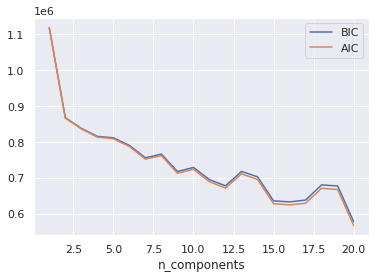

In [0]:
n_components = np.arange(1, 20)
models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(labels)
          for n in n_components]

plt.plot(n_components, [m.bic(labels) for m in models], label='BIC')
plt.plot(n_components, [m.aic(labels) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components');

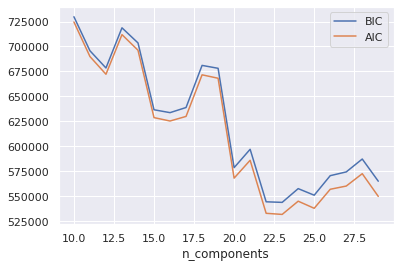

In [0]:
n_components = np.arange(10, 30)
models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(labels)
          for n in n_components]

plt.plot(n_components, [m.bic(labels) for m in models], label='BIC')
plt.plot(n_components, [m.aic(labels) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components');

In [0]:
prediction_20 = GaussianMixture(20, covariance_type='full', random_state=0).fit(labels).predict(labels)

In [0]:
prediction_20

array([14, 13, 13, ..., 14, 14, 14])

In [0]:
print(min(prediction_20))
print(max(prediction_20))

0
19


In [0]:
percentages = [0] * 20
for i in range(len(prediction_20)):
    percentages[prediction_20[i]] += 1
for i in range(len(percentages)):
    percentages[i] = percentages[i] / len(prediction_20)

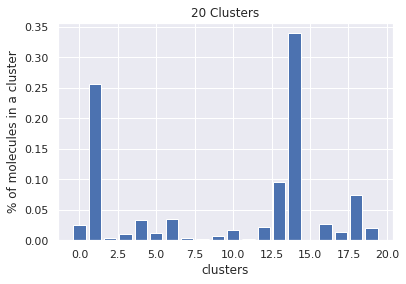

In [0]:
fig, ax = plt.subplots()
x = [i for i in range(20)]
plt.bar(x, percentages)
ax.set_xlabel('clusters')
ax.set_ylabel('% of molecules in a cluster')
ax.set_title('20 Clusters')
plt.show()

In [0]:
prediction_40 = GaussianMixture(40, covariance_type='full', random_state=0).fit(labels).predict(labels)
print(prediction_40)

print(min(prediction_40))
print(max(prediction_40))

[29  5  5 ... 12 12 12]
0
39


In [0]:
percentages = [0] * 40
for i in range(len(prediction_40)):
    percentages[prediction_40[i]] += 1
for i in range(len(percentages)):
    percentages[i] = percentages[i] / len(prediction_40)

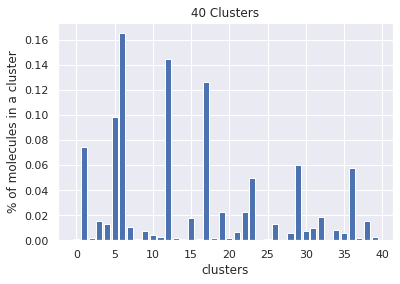

In [0]:
fig, ax = plt.subplots()
x = [i for i in range(40)]
plt.bar(x, percentages)
ax.set_xlabel('clusters')
ax.set_ylabel('% of molecules in a cluster')
ax.set_title('40 Clusters')
plt.show()

In [0]:
prediction_60 = GaussianMixture(60, covariance_type='full', random_state=0).fit(labels).predict(labels)

In [0]:
prediction_60

array([ 4, 31, 31, ..., 15, 15, 15])

In [0]:
print(min(prediction_60))
print(max(prediction_60))

0
59


In [0]:
percentages = [0] * 60
for i in range(len(prediction_60)):
    percentages[prediction_60[i]] += 1
for i in range(len(percentages)):
    percentages[i] = percentages[i] / len(prediction_60)

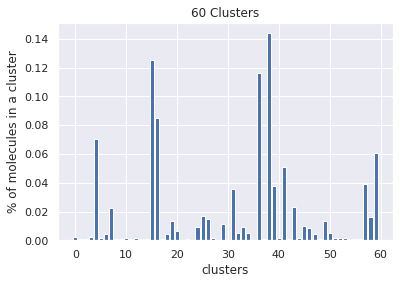

In [0]:
fig, ax = plt.subplots()
plt.bar(x, percentages)
ax.set_xlabel('clusters')
ax.set_ylabel('% of molecules in a cluster')
ax.set_title('60 Clusters')
plt.show()

In [0]:
# clustering
from sklearn import metrics
from sklearn.metrics import pairwise_distances
from sklearn.metrics import davies_bouldin_score
clusters = [10, 20, 40, 60]
scores = []
for n in clusters: 
    prediction = GaussianMixture(n, covariance_type='full', random_state=0).fit(labels).predict(labels)
    score = metrics.silhouette_score(labels, prediction, metric='euclidean')
    print(score)
    scores.append(score)

-0.11002685988260165
-0.2301208496206736
-0.3096487395145157
-0.46497097721513064


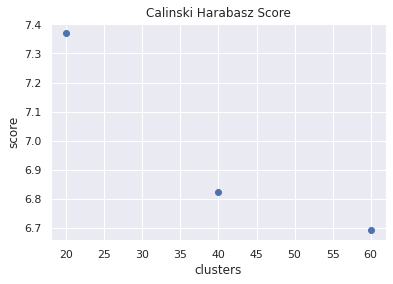

In [0]:
fig, ax = plt.subplots()
plt.scatter(clusters, scores)
ax.set_xlabel('clusters')
ax.set_ylabel('score')
ax.set_title('Calinski Harabasz Score')
plt.show()

In [0]:
meltPt_prop2 = pd.read_csv('/content/drive/My Drive/Data_LDA/cleaned_MeltingPt_vecs.csv')
meltPt_prop2.set_index('smiles', inplace=True)
meltPt_prop2.drop(columns=["Unnamed: 0", "Unnamed: 0.1"], inplace=True)
meltPt_prop2.head()

,vec_0,vec_1,vec_2,vec_3,vec_4,vec_5,vec_6,vec_7,vec_8,vec_9,vec_10,vec_11,vec_12,vec_13,vec_14,vec_15,vec_16,vec_17,vec_18,vec_19,vec_20,vec_21,vec_22,vec_23,vec_24,vec_25,vec_26,vec_27,vec_28,vec_29,vec_30,vec_31,vec_32,vec_33,vec_34,vec_35,vec_36,vec_37,vec_38,vec_39,...,vec_260,vec_261,vec_262,vec_263,vec_264,vec_265,vec_266,vec_267,vec_268,vec_269,vec_270,vec_271,vec_272,vec_273,vec_274,vec_275,vec_276,vec_277,vec_278,vec_279,vec_280,vec_281,vec_282,vec_283,vec_284,vec_285,vec_286,vec_287,vec_288,vec_289,vec_290,vec_291,vec_292,vec_293,vec_294,vec_295,vec_296,vec_297,vec_298,vec_299
smiles,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
B(C)(C)Br,-0.643549,1.403576,-0.136568,0.016938,0.548279,0.525434,-2.511350,0.566678,0.772374,0.610506,-0.434901,-1.102085,0.305184,-0.157024,-0.515253,-0.805841,1.205780,-0.281174,0.402330,1.554647,0.681653,0.588921,1.714938,1.061544,-0.884617,-1.511936,-0.495137,-0.190816,0.320016,-0.174376,1.230625,-0.641985,-0.416930,-0.947630,-0.003417,0.739325,0.380350,-0.663858,1.507820,0.165970,...,-1.114290,0.316985,0.572651,1.851282,0.550302,-1.040443,-0.365290,0.594854,0.401293,-0.948985,-0.615840,1.554033,-1.281979,0.372087,-0.336097,-1.996323,-0.358260,0.314572,0.654824,0.702450,-1.044243,-1.377691,-0.263034,-0.868790,0.461678,1.282874,-0.624078,-0.458547,-0.483029,0.635145,-0.812718,-0.264168,-0.638758,0.585099,-0.815716,-0.306870,-0.987928,-1.133075,-1.522481,-0.013224
B(C)(O)O,-0.577135,2.453745,1.159278,-1.374165,1.889976,1.441860,-4.510305,1.398043,1.530120,2.144882,-1.970033,-1.096980,0.835341,-0.959592,-2.272716,-1.973937,1.464243,-0.546352,-0.477666,1.650529,1.209631,-0.415389,2.558036,-0.681152,0.487769,-0.637497,-1.280608,2.295167,0.448645,0.339139,1.347745,-0.937108,-0.340035,0.217093,0.169103,1.748776,0.614023,-0.059746,1.361495,-0.719643,...,-1.561305,-0.099734,1.123164,1.630620,-0.367356,-0.658567,-0.468536,1.357987,0.116113,-2.078733,-2.558889,1.436359,-1.962438,0.473747,-1.053839,-2.947655,-1.010017,0.602191,1.494617,1.291709,0.663479,-0.621137,-1.492216,-0.794364,-0.649684,2.710180,-0.603537,-0.942447,0.842696,1.484331,-0.647403,-1.789785,0.183944,1.218015,-0.770867,-0.743426,-0.890780,-0.632267,-1.459616,1.273663
B(C1CC1)(O)O,0.194751,2.065573,1.198497,-1.016377,1.347588,1.174706,-5.588579,1.749553,1.089366,2.538345,-0.838773,-1.725143,0.069359,-0.203648,-2.798777,-2.920225,0.695258,-0.970542,-1.600018,1.867847,1.049489,0.380569,3.009509,0.592392,0.372538,-1.171943,-2.429568,1.946834,-0.044474,-0.250060,1.347984,-1.941655,-1.219523,0.419320,0.741669,2.286485,0.311404,-0.179804,2.920954,-0.025604,...,-0.948323,0.155126,1.686361,2.479353,0.291021,-1.536124,-0.772614,2.512200,0.333495,-3.046927,-2.630594,0.947578,-2.697947,-0.630542,-1.112475,-3.607898,-1.236069,0.808710,1.000181,1.897593,0.811157,-1.289436,-2.387887,-1.697917,-0.335489,4.176419,-1.157866,-1.796167,0.602731,1.509443,-0.478695,0.242686,-0.054460,0.991172,-2.097246,-1.867354,-2.570229,-0.573303,-2.496968,1.794700
B(C=CCC(C)C)(O)O,-1.525205,1.805014,-0.518784,-2.160116,4.236376,1.714284,-7.393000,-0.107512,3.893012,0.848587,-1.069784,-0.914428,1.697722,-1.387471,-4.056946,-4.137435,3.055914,-2.984649,-1.556069,3.886853,2.235352,1.807477,6.384276,0.642534,-0.506808,0.669432,-3.896414,-0.182701,1.285935,-0.461105,2.767166,-1.871888,-2.663631,-0.873656,0.671837,1.241951,-0.456515,0.879268,3.098188,0.127496,...,-1.900598,1.552080,-0.757657,2.590250,-0.095578,-2.113073,-1.655722,1.445834,1.772226,-2.175039,-3.904420,2.811106,-4.237155,0.678272,0.140434,-5.077536,-1.855269,1.141025,1.306532,3.064927,0.001099,-1.516921,-3.465250,-1.304029,-0.164945,2.604286,-1.345424,-0.248653,0.526468,0.866332,-2.109497,-1.607454,2.314450,1.321290,-3.559767,-2.254014,-1.847931,-1.552048,-3.775062,0.459407
B(C=CCCC)(O)O,-1.210874,1.947975,0.323048,-1.971842,3.623491,2.481533,-7.943348,0.476074,2.350111,2.307431,-1.565070,-2.139922,0.894437,0.138390,-4.601700,-2.950188,2.161628,-2.529657,-1.432521,3.464771,

[12 12 12 ...  7  7  9]
0
19


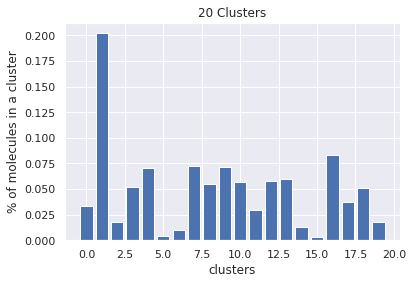

In [0]:
prediction_20 = GaussianMixture(20, covariance_type='full', random_state=0).fit(meltPt_prop2).predict(meltPt_prop2)
print(prediction_20)

print(min(prediction_20))
print(max(prediction_20))

percentages = [0] * 20
for i in range(len(prediction_20)):
    percentages[prediction_20[i]] += 1
for i in range(len(percentages)):
    percentages[i] = percentages[i] / len(prediction_20)

fig, ax = plt.subplots()
x = [i for i in range(20)]
plt.bar(x, percentages)
ax.set_xlabel('clusters')
ax.set_ylabel('% of molecules in a cluster')
ax.set_title('20 Clusters')
plt.show()

[26 26 26 ... 39 39  7]
0
39


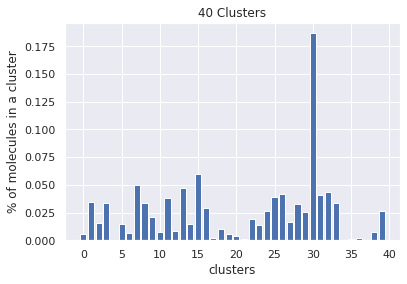

In [0]:
prediction_40 = GaussianMixture(40, covariance_type='full', random_state=0).fit(meltPt_prop2).predict(meltPt_prop2)
print(prediction_40)

print(min(prediction_40))
print(max(prediction_40))

percentages = [0] * 40
for i in range(len(prediction_40)):
    percentages[prediction_40[i]] += 1
for i in range(len(percentages)):
    percentages[i] = percentages[i] / len(prediction_40)

fig, ax = plt.subplots()
x = [i for i in range(40)]
plt.bar(x, percentages)
ax.set_xlabel('clusters')
ax.set_ylabel('% of molecules in a cluster')
ax.set_title('40 Clusters')
plt.show()

In [0]:
with open("prediction_40_gmm.txt", "w") as output:
    for row in prediction_40:
        output.write(str(row) + '\n')

[33 33 33 ... 13 13 34]
0
39


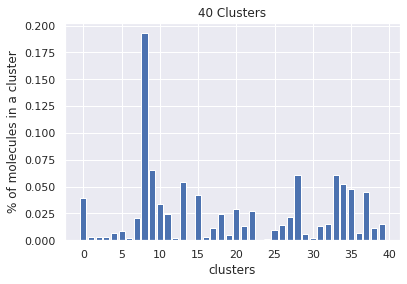

In [0]:
from sklearn.cluster import AgglomerativeClustering
prediction_40 = AgglomerativeClustering(n_clusters=40).fit_predict(meltPt_prop2)
print(prediction_40)

print(min(prediction_40))
print(max(prediction_40))

percentages = [0] * 40
for i in range(len(prediction_40)):
    percentages[prediction_40[i]] += 1
for i in range(len(percentages)):
    percentages[i] = percentages[i] / len(prediction_40)

fig, ax = plt.subplots()
x = [i for i in range(40)]
plt.bar(x, percentages)
ax.set_xlabel('clusters')
ax.set_ylabel('% of molecules in a cluster')
ax.set_title('40 Clusters')
plt.show()

In [0]:
with open("prediction_40_hier.txt", "w") as output:
    for row in prediction_40:
        output.write(str(row) + '\n')

[ 6  6  6 ... 33  5  5]
0
59


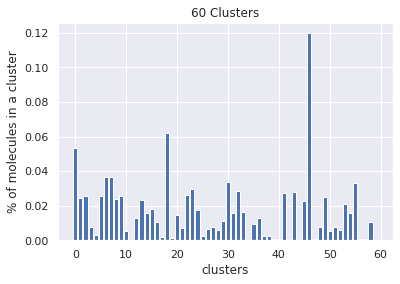

In [0]:
prediction_60 = GaussianMixture(60, covariance_type='full', random_state=0).fit(meltPt_prop2).predict(meltPt_prop2)
print(prediction_60)

print(min(prediction_60))
print(max(prediction_60))

percentages = [0] * 60
for i in range(len(prediction_60)):
    percentages[prediction_60[i]] += 1
for i in range(len(percentages)):
    percentages[i] = percentages[i] / len(prediction_60)

fig, ax = plt.subplots()
x = [i for i in range(60)]
plt.bar(x, percentages)
ax.set_xlabel('clusters')
ax.set_ylabel('% of molecules in a cluster')
ax.set_title('60 Clusters')
plt.show()

In [0]:
scores = []
for pred in [prediction_20, prediction_40, prediction_60]: 
    score = davies_bouldin_score(labels, pred)
    print(score)
    scores.append(score)

7.297202540925889
6.632894662274876
7.317934064396324


Lower Davies-Bouldin index relates to a model with better separation between the clusters.
https://scikit-learn.org/stable/modules/clustering.html#calinski-harabasz-index

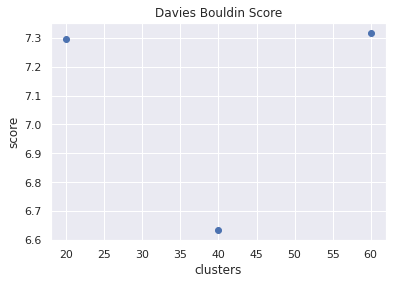

In [0]:
fig, ax = plt.subplots()
plt.scatter([20,40,60], scores)
ax.set_xlabel('clusters')
ax.set_ylabel('score')
ax.set_title('Davies Bouldin Score')
plt.show()